In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np

In [92]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Conv2d(16, 16, 3),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25)
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 16, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25)
        )

        self.conv3 = nn.Sequential(
            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25)
        )

        self.fc = nn.Sequential(
            nn.Linear(32, 10)
        )



    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)

        x = x.view(x.size(0), -1)
        x = self.fc(x)
        x = F.log_softmax(x, dim=1)
        return x


In [93]:
!pip install torchsummary
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
from torchsummary import summary
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

CUDA Available? True
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
              ReLU-2           [-1, 16, 28, 28]               0
       BatchNorm2d-3           [-1, 16, 28, 28]              32
            Conv2d-4           [-1, 16, 26, 26]           2,320
              ReLU-5           [-1, 16, 26, 26]               0
       BatchNorm2d-6           [-1, 16, 26, 26]              32
         MaxPool2d-7           [-1, 16, 13, 13]               0
           Dropout-8           [-1, 16, 13, 13]               0
            Conv2d-9           [-1, 16, 13, 13]           2,320
             ReLU-10           [-1, 16, 13, 13]               0
      BatchNorm2d-11           [-1, 16, 13, 13]              32
           Conv2d-12           [-1, 32, 13, 13]           4,640
             ReLU-13           [-1, 32, 13, 13]               0
      BatchNorm2d-

In [86]:
torch.manual_seed(1)
batch_size = 16
SEED = 1
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

kwargs = {'num_workers': 2, 'pin_memory': True} if use_cuda else {}
batch_size = 16
classes = range(10)
train = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
#train_loader = torch.utils.data.DataLoader(dataset=train,batch_size=batch_size,shuffle = True)

#test_loader  = torch.utils.data.DataLoader(dataset=test,batch_size=batch_size,shuffle = False)


CUDA Available? True


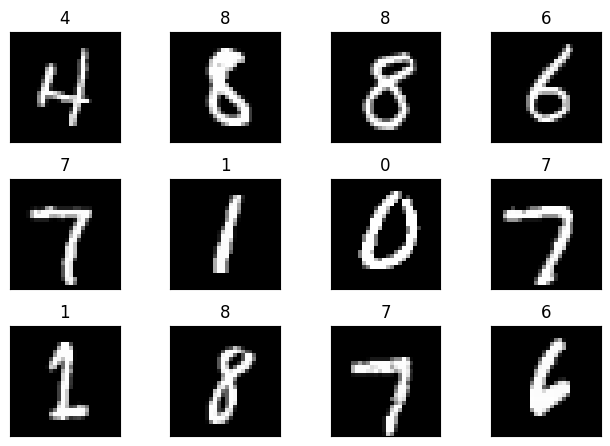

In [68]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [69]:
all_images = torch.stack([img for img, _ in train], dim=0)
flattened_images = all_images.view(-1)
mean = flattened_images.mean()
std = flattened_images.std()
print(f"Mean of MNIST dataset: {mean.item():.4f}")
print(f"Standard deviation of MNIST dataset: {std.item():.4f}")

Mean of MNIST dataset: -0.0001
Standard deviation of MNIST dataset: 1.0000


In [95]:
model = Net().to(device)
criterion = nn.NLLLoss()   # with log_softmax() as the last layer, this is equivalent to cross entropy loss
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [8]:
model

Net(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
    (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Dropout(p=0.25, inplace=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): B

In [96]:
# Training Time!
import time
import copy

# Some initialization work first...
epochs = 20
train_losses, val_losses = [], []
train_accu, val_accu = [], []
start_time = time.time()
early_stop_counter = 10   # stop when the validation loss does not improve for 10 iterations to prevent overfitting
counter = 0
best_val_loss = float('Inf')
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

for e in range(epochs):
    epoch_start_time = time.time()
    running_loss = 0
    accuracy=0
    # training step
    model.train()
    for images, labels in train:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        log_ps = model(images)

        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))

        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # record training loss and error, then evaluate using validation data
    train_losses.append(running_loss/len(train))
    train_accu.append(accuracy/len(train))
    val_loss = 0
    accuracy=0
    model.eval()
    with torch.no_grad():
        for images, labels in test:
            images = images.to(device)
            labels = labels.to(device)
            log_ps = model(images)
            val_loss += criterion(log_ps, labels)

            ps = torch.exp(log_ps)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor))
    val_losses.append(val_loss/len(test))
    val_accu.append(accuracy/len(test))

    print("Epoch: {}/{}.. ".format(e+1, epochs),
          "Time: {:.2f}s..".format(time.time()-epoch_start_time),
          "Training Loss: {:.3f}.. ".format(train_losses[-1]),
          "Training Accu: {:.3f}.. ".format(train_accu[-1]),
          "Val Loss: {:.3f}.. ".format(val_losses[-1]),
          "Val Accu: {:.3f}".format(val_accu[-1]))

#     print('Epoch %d / %d took %6.2f seconds' % (e+1, epochs, time.time()-epoch_start_time))
#     print('Total training time till this epoch was %8.2f seconds' % (time.time()-start_time))

    if val_losses[-1] < best_val_loss:
        best_val_loss = val_losses[-1]
        counter=0
        best_model_wts = copy.deepcopy(model.state_dict())
    else:
        counter+=1
        print('Validation loss has not improved since: {:.3f}..'.format(best_val_loss), 'Count: ', str(counter))
        if counter >= early_stop_counter:
            print('Early Stopping Now!!!!')
            model.load_state_dict(best_model_wts)
            break

Epoch: 1/20..  Time: 42.39s.. Training Loss: 0.968..  Training Accu: 0.699..  Val Loss: 0.160..  Val Accu: 0.959
Epoch: 2/20..  Time: 41.32s.. Training Loss: 0.261..  Training Accu: 0.928..  Val Loss: 0.080..  Val Accu: 0.976
Epoch: 3/20..  Time: 42.31s.. Training Loss: 0.173..  Training Accu: 0.952..  Val Loss: 0.054..  Val Accu: 0.982
Epoch: 4/20..  Time: 42.38s.. Training Loss: 0.132..  Training Accu: 0.962..  Val Loss: 0.043..  Val Accu: 0.985
Epoch: 5/20..  Time: 41.68s.. Training Loss: 0.110..  Training Accu: 0.969..  Val Loss: 0.043..  Val Accu: 0.986
Validation loss has not improved since: 0.043.. Count:  1
Epoch: 6/20..  Time: 42.57s.. Training Loss: 0.098..  Training Accu: 0.972..  Val Loss: 0.036..  Val Accu: 0.988
Epoch: 7/20..  Time: 41.59s.. Training Loss: 0.088..  Training Accu: 0.975..  Val Loss: 0.035..  Val Accu: 0.988
Epoch: 8/20..  Time: 41.69s.. Training Loss: 0.081..  Training Accu: 0.976..  Val Loss: 0.029..  Val Accu: 0.990
Epoch: 9/20..  Time: 41.79s.. Training